In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.visualization import simple_norm

from astroquery.sdss import SDSS

# Load spectral temlate

In [10]:
template = SDSS.get_spectral_template('qso_bright')[0]
template

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x119567620>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x119566990>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x119358560>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x119569be0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1195691c0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x119874aa0>]

In [11]:
def wave2redshift(wave, z):
    return wave / (1 + z)

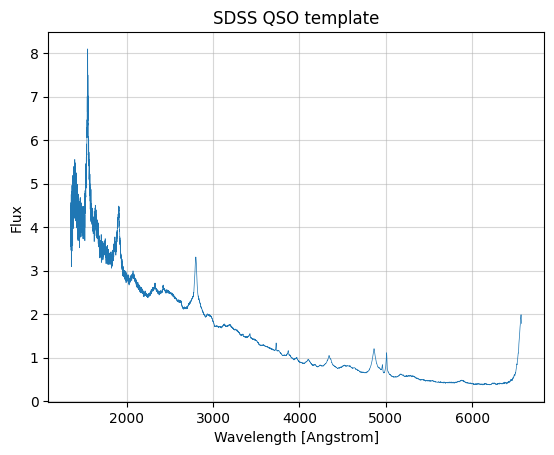

In [12]:
first_pixel_wavelength = template[0].header['COEFF0']
delta_lambda = template[0].header['COEFF1']
flux_sdss = template[0].data[0]
waves_sdss = 10 ** (first_pixel_wavelength + delta_lambda * np.arange(flux_sdss.size))
waves_sdss2 = wave2redshift(waves_sdss, 2.0)


plt.plot(waves_sdss, flux_sdss, lw=0.5, label='redshift=0')
plt.title('SDSS QSO template')
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Flux')
plt.grid(alpha=0.5)
plt.show()

# Process the spectra cubes

In [15]:
hdul_b = fits.open('data/SMSS 072242.59-390159.6/Spectra/OBK-943744-WiFeS-Blue-UT20241224T153733-5.cube.fits')
hdul_r = fits.open('data/SMSS 072242.59-390159.6/Spectra/OBK-943744-WiFeS-Red--UT20241224T153733-5.cube.fits')
hdul_b.info()

Filename: data/SMSS 072242.59-390159.6/Spectra/OBK-943744-WiFeS-Blue-UT20241224T153733-5.cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SCI           1 PrimaryHDU     125   (25, 38, 3491)   float32   
  1  VAR           1 ImageHDU       126   (25, 38, 3491)   float32   
  2  DQ            1 ImageHDU       126   (25, 38, 3491)   int16   


## R filter

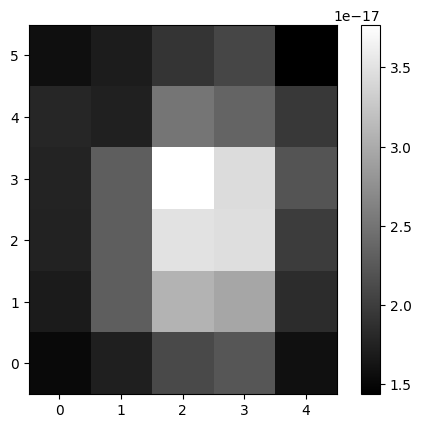

In [16]:
data_r = hdul_r[0].data
header_r = hdul_r[0].header
wy, wx = 10, 16
dx, dy = 2, -1
sp_r = np.zeros(data_r.shape[0])
ref_r = header_r['CRVAL3']
step_r = header_r['CDELT3']

img = data_r[500][wx+dx:-wx+dx, wy+dy:-wy+dy]
norm = simple_norm(img, 'linear', percent=99.)
plt.imshow(img, norm=norm, origin='lower', cmap='gray')

plt.colorbar()
plt.show()


## Blue filter

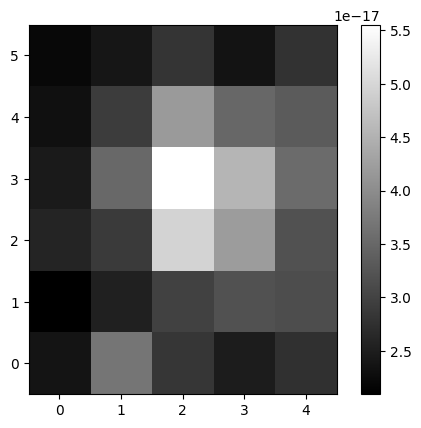

In [17]:
data_b = hdul_b[0].data
header_b = hdul_b[0].header
ref_b = header_b['CRVAL3']
step_b = header_b['CDELT3']

wy, wx = 10, 16
dx, dy = 2, -1
sp_b = np.zeros(data_b.shape[0])

img = data_b[2000][wx+dx:-wx+dx, wy+dy:-wy+dy]
norm = simple_norm(img, 'linear', percent=99.)
plt.imshow(img, norm=norm, origin='lower', cmap='gray')
plt.colorbar()
plt.show()


## Plot

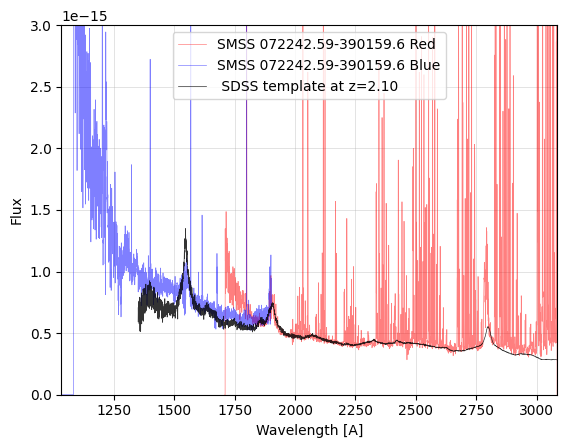

In [18]:
waves_r = np.arange(ref_r, ref_r + step_r * data_r.shape[0]-1, step_r)
waves_b = np.arange(ref_b, ref_b + step_b * data_b.shape[0], step_b)

for i in range(0, data_r.shape[0]):
    img = data_r[i][wx+dx:-wx+dx, wy+dy:-wy+dy]
    sp_r[i] = np.sum(img)
for i in range(0, data_b.shape[0]):
    img = data_b[i][wx+dx:-wx+dx, wy+dy:-wy+dy]
    sp_b[i] = np.sum(img)


z = 2.1
waves_r = wave2redshift(waves_r, z)
waves_b = wave2redshift(waves_b, z)

plt.plot(waves_r, sp_r, 'r-', markersize=1, lw=0.5, alpha=0.5, label='SMSS 072242.59-390159.6 Red')
plt.plot(waves_b, sp_b, 'b-', markersize=1, lw=0.5, alpha=0.5, label='SMSS 072242.59-390159.6 Blue')

plt.plot(waves_sdss, flux_sdss/6e15, 'k-', lw=0.5, alpha=0.8, label=f' SDSS template at z={z:.2f}')

# plt.yscale('log')
plt.ylim(0, 3e-15)
plt.xlim(waves_b.min(), waves_r.max())
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.grid(alpha=0.5, lw=0.5)
plt.legend()

plt.show()

## Images

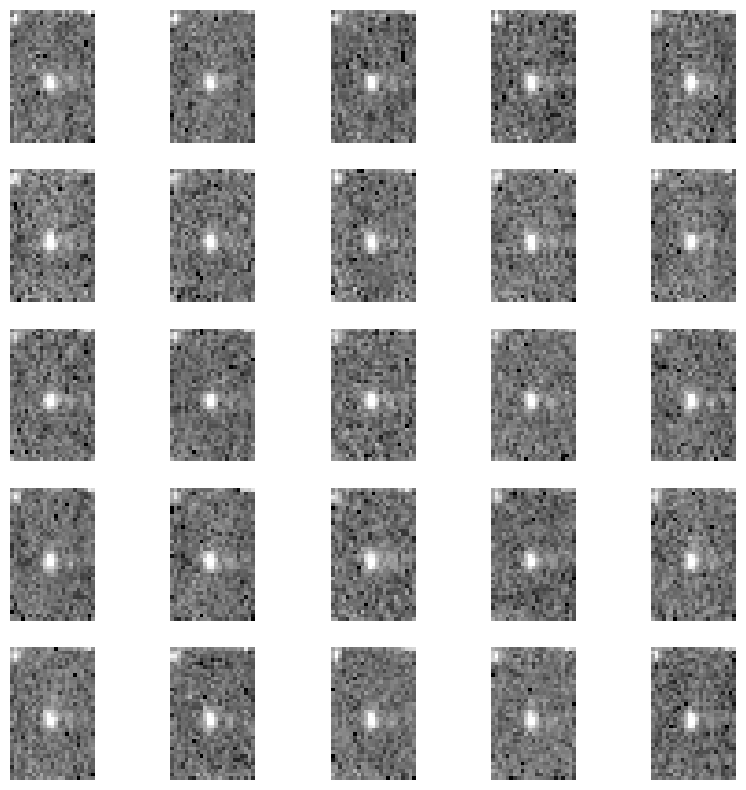

In [166]:
dx, dy = 1, 1

fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.ravel()
for i in range(25):
    data = hdul_r[0].data[i+1500][dx:-dx, dy:-dy]
    norm = simple_norm(data, 'sqrt', percent=99.)
    axs[i].imshow(data, 
                  norm=norm,
                  cmap='gray')
    axs[i].axis('off')
plt.show()

# Onaken

In [23]:
hdul_b = fits.open('data/SMSS 072242.59-390159.6/Spectra/OBK-943744-WiFeS-Blue-UT20241224T153733-5.cube.extract.fits')
hdul_r = fits.open('data/SMSS 072242.59-390159.6/Spectra/OBK-943744-WiFeS-Red--UT20241224T153733-5.cube.extract.fits')

In [28]:
# hdul_b[0].header
hdul_b[0].data.shape

(3491,)

In [25]:
data_r = hdul_r[0].data
header_r = hdul_r[0].header
wy, wx = 10, 16
dx, dy = 2, -1
sp_r = np.zeros(data_r.shape[0])
ref_r = header_r['CRVAL1']
step_r = header_r['CDELT1']

data_b = hdul_b[0].data
header_b = hdul_b[0].header
wy, wx = 10, 16
dx, dy = 2, -1
sp_b = np.zeros(data_b.shape[0])
ref_b = header_b['CRVAL1']
step_b = header_b['CDELT1']


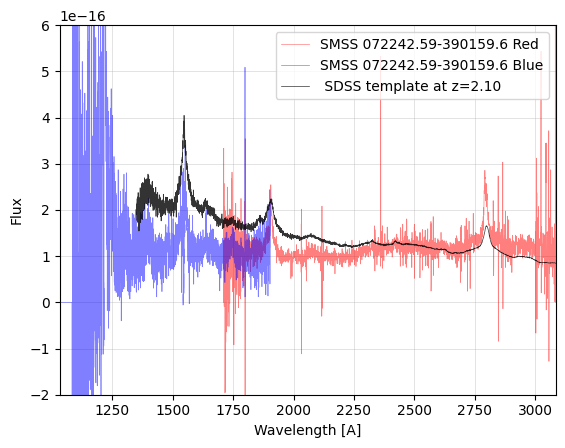

In [43]:
waves_r = np.arange(ref_r, ref_r + step_r * data_r.shape[0]-1, step_r)
waves_b = np.arange(ref_b, ref_b + step_b * data_b.shape[0], step_b)

z = 2.1
waves_r = wave2redshift(waves_r, z)
waves_b = wave2redshift(waves_b, z)

plt.plot(waves_r, data_r, 'r-', markersize=1, lw=0.5, alpha=0.5, label='SMSS 072242.59-390159.6 Red')
plt.plot(waves_b, data_b, 'b-', markersize=1, lw=0.5, alpha=0.5, label='SMSS 072242.59-390159.6 Blue')

plt.plot(waves_sdss, flux_sdss/2e16, 'k-', lw=0.5, alpha=0.8, label=f' SDSS template at z={z:.2f}')

# plt.yscale('log')
plt.ylim(-2e-16, 6e-16)
plt.xlim(waves_b.min(), waves_r.max())
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.grid(alpha=0.5, lw=0.5)
plt.legend()

plt.show()